<a href="https://colab.research.google.com/github/songgeunil/pfx_parser/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 예제로 실습하기

<h2>1. 디렉토리 지정</h2>

In [0]:
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.options.display.max_rows = 10
pd.set_option('display.max_columns', 100)
pd.set_option('float_format', '{:.2f}'.format)
warnings.filterwarnings("ignore")

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h2>2. 데이터 불러오기</h2>

In [0]:
#content 안에 gdrive 안에 My Drive 안에 타이타닉 안에 있는 train.csv를 불러온다.
train=pd.read_csv('/content/gdrive/My Drive/타이타닉/train.csv')

<h2>3. 데이터 형태 관찰</h2>

In [28]:
train.shape
#데이터는 891개의 행과, 12개의 열로 이루어져 있다.

(891, 12)

In [24]:
train.head()
#train 데이터의 상위 5개의 row만 보여준다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


<h2>4. Survived 관찰</h2>

In [29]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

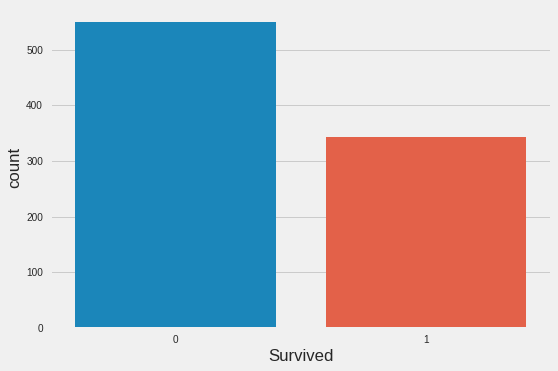

In [35]:
sns.countplot('Survived',data=train)
#죽은 사람이 생존자보다 많다는 정보를 알 수 있다.

In [36]:
train['Survived'].mean()

0.3838383838383838

891명 중에서 38% 정도만 살아남았다.



<h2>5. 성별에 따른 Survived 관찰</h2>

In [53]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [39]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여자가 남자보다 훨씬 더 생존률이 높다는 것을 알 수 있다

Text(0.5, 1.0, 'Survival Rate by Sex')

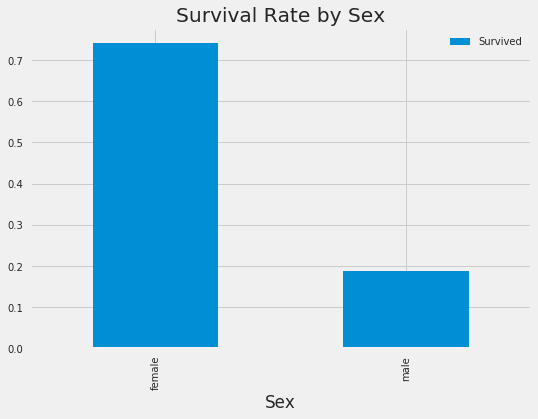

In [46]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.title('Survival Rate by Sex')

<h2>6. pclass에 따른 생존률</h2>

In [54]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [47]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1   0.63
2   0.47
3   0.24
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Pclass')

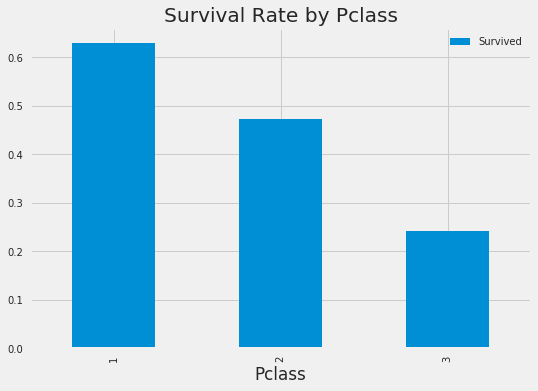

In [48]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
plt.title('Survival Rate by Pclass')

<h2>7. 나이에 따른 생존률</h2>

In [55]:
train['Age'].describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

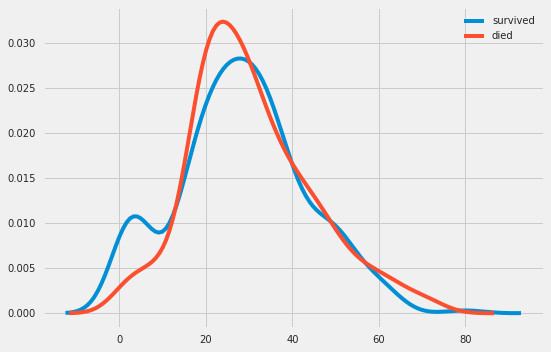

In [52]:
sns.kdeplot(train.loc[train['Survived']==1,'Age'],label='survived')
sns.kdeplot(train.loc[train['Survived']==0,'Age'],label='died')

<h2>8. SibSp에 따른 생존률</h2>

In [56]:
train['SibSp'].describe()

count   891.00
mean      0.52
std       1.10
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       8.00
Name: SibSp, dtype: float64

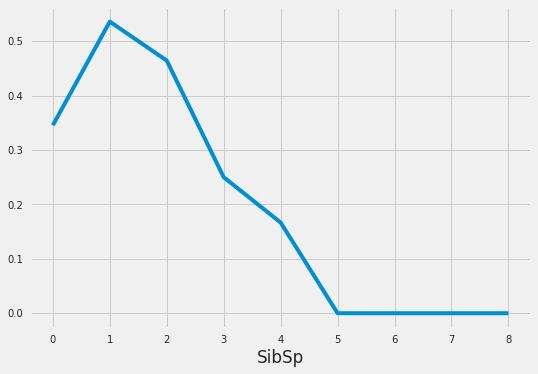

In [58]:
train.groupby(['SibSp'])['Survived'].mean().plot()

<h2>9. Parch에 따른 생존률</h2>

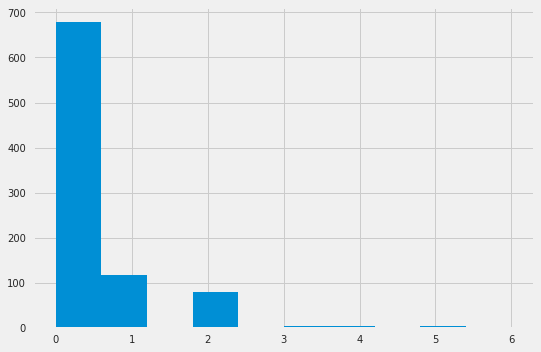

In [61]:
train['Parch'].hist()

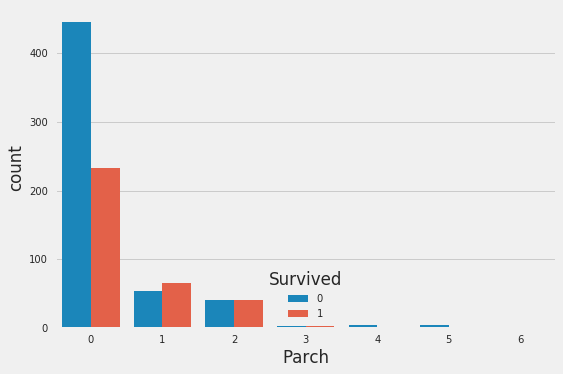

In [62]:
sns.countplot('Parch',hue='Survived',data=train)

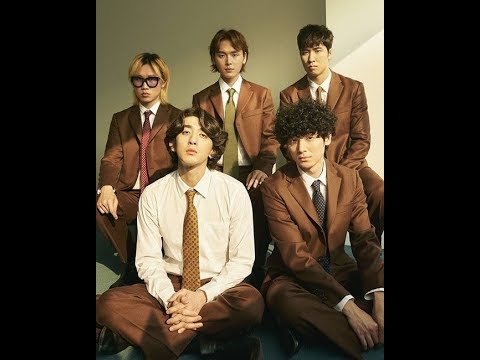

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('uHqPGh1NoVw', width=600, height=400)